# **Procesamiento de Imágenes - Operaciones de Punto y Convolución**

**Objetivo:** Comprender y aplicar las dos familias de operaciones fundamentales en el procesamiento de imágenes: las **operaciones de punto** y la **convolución**. Al finalizar este cuaderno, el estudiante podrá manipular el brillo y contraste de una imagen, aplicar umbralizaciones y transformaciones no lineales, e implementar filtros convolucionales para suavizar, detectar bordes, realzar detalles y analizar texturas.

**Librerías utilizadas:**
*   `NumPy`: Para la manipulación de las matrices que representan las imágenes y los kernels.
*   `Matplotlib`: Para visualizar las imágenes y los resultados de los filtros.
*   `scikit-image`: Para funciones auxiliares como la conversión a escala de grises.
*   `SciPy`: Específicamente, su función `convolve2d` para realizar la operación de convolución 2D de manera eficiente.

In [1]:
# Importación de las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from scipy.signal import convolve2d

### **Operaciones de Punto y Convolución**

#### **Parte 1: Operaciones de Punto**

**Concepto:** Las operaciones de punto (o puntuales) son las transformaciones más sencillas en el procesamiento de imágenes. En estas operaciones, el nuevo valor de un píxel en la posición `(x, y)` depende **únicamente** de su valor original en esa misma posición. No se tiene en cuenta a los píxeles vecinos.

La fórmula general es:
`Salida(x, y) = f(Entrada(x, y))`

Donde `f` es una función de transformación que se aplica a cada píxel de manera independiente. Estas operaciones modifican directamente el histograma de la imagen.


In [8]:
image_rgb = imread('horses.jpg')
image_gray = rgb2gray(image_rgb)

# Es importante normalizar la imagen a un rango [0, 1] o [0, 255].
# Para las operaciones de punto, usar el rango [0, 255] y tipo entero (uint8)
# es a menudo más intuitivo, ya que evita valores flotantes intermedios.
image_gray_uint8 = (image_gray * 255).astype(np.uint8)

##### **1.1. Ajuste de Brillo**
Aumentar o disminuir el brillo de una imagen es una operación de punto aditiva. Simplemente se suma o se resta un valor constante a cada píxel.

**Importante:** Después de la operación, debemos asegurarnos de que los valores de los píxeles permanezcan en el rango válido . A esto se le llama **saturación** o **clipping**.


In [ ]:
def ajustar_brillo(imagen, valor):
    """
    Ajusta el brillo de una imagen sumando un valor.
    - valor > 0: Aumenta el brillo.
    - valor < 0: Disminuye el brillo.
    """
    # Usamos np.clip para limitar los valores entre 0 y 255.
    # Primero convertimos la imagen y el valor a un tipo que soporte la suma (ej. int16)
    # para evitar desbordamiento (overflow) con uint8.
    resultado = np.clip(imagen.astype(np.int16) + valor, 0, 255)
    return resultado.astype(np.uint8)

# Aplicar ajuste de brillo
brillo_alto = ajustar_brillo(image_gray_uint8, 50)
brillo_bajo = ajustar_brillo(image_gray_uint8, -50)

# Visualizar resultados
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image_gray_uint8, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Brillo Aumentado (+50)')
plt.imshow(brillo_alto, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Brillo Disminuido (-50)')
plt.imshow(brillo_bajo, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.show()

##### **1.2. Ajuste de Contraste**
El contraste se refiere a la diferencia entre las zonas claras y oscuras de una imagen. Una forma sencilla de ajustarlo es mediante una operación multiplicativa.


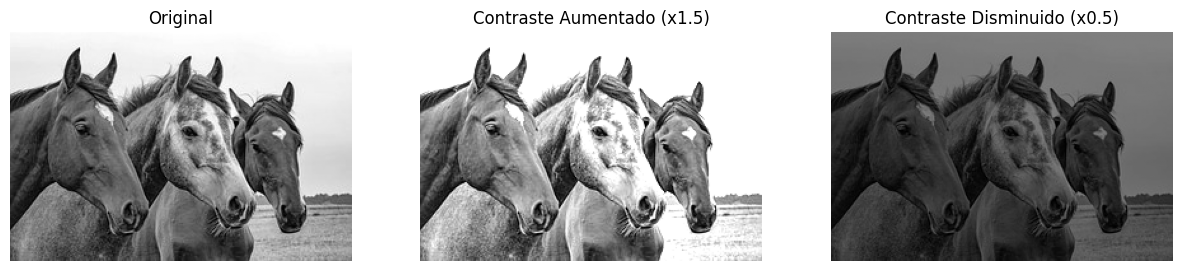

In [9]:
def ajustar_contraste(imagen, factor):
    """
    Ajusta el contraste de una imagen multiplicando por un factor.
    - factor > 1: Aumenta el contraste.
    - 0 < factor < 1: Disminuye el contraste.
    """
    resultado = np.clip(imagen.astype(np.float32) * factor, 0, 255)
    return resultado.astype(np.uint8)

# Aplicar ajuste de contraste
contraste_alto = ajustar_contraste(image_gray_uint8, 1.5)
contraste_bajo = ajustar_contraste(image_gray_uint8, 0.5)

# Visualizar resultados
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image_gray_uint8, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Contraste Aumentado (x1.5)')
plt.imshow(contraste_alto, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Contraste Disminuido (x0.5)')
plt.imshow(contraste_bajo, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.show()

##### **1.3. Umbralización (Thresholding)**
La umbralización es una operación que convierte una imagen en escala de grises a una imagen binaria (blanco y negro). Se define un umbral `T`:
*   Si el valor de un píxel es mayor que `T`, se convierte en blanco (255).
*   Si es menor o igual que `T`, se convierte en negro (0).

Es una técnica fundamental para la segmentación de imágenes.


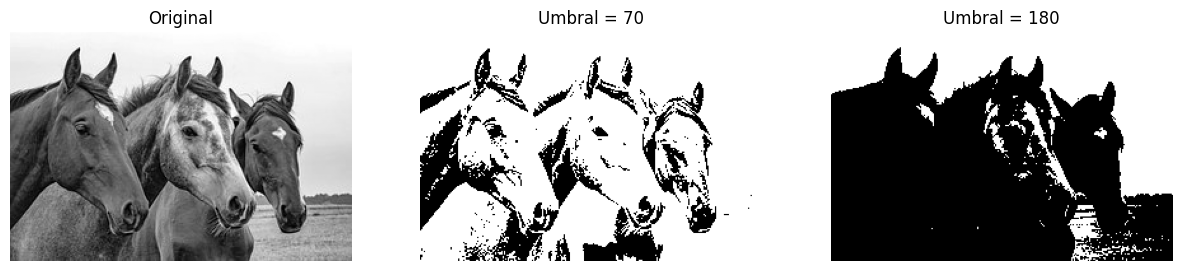

In [10]:
def umbralizar(imagen, umbral):
    """
    Aplica umbralización a una imagen.
    """
    # La comparación devuelve una matriz de booleanos (True/False).
    # Al multiplicar por 255, True se convierte en 255 y False en 0.
    resultado = (imagen > umbral) * 255
    return resultado.astype(np.uint8)

# Aplicar umbralización con diferentes valores
umbral_bajo = umbralizar(image_gray_uint8, 70)
umbral_alto = umbralizar(image_gray_uint8, 180)

# Visualizar resultados
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image_gray_uint8, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Umbral = 70')
plt.imshow(umbral_bajo, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Umbral = 180')
plt.imshow(umbral_alto, cmap='gray')
plt.axis('off')

plt.show()

***

### **Parte 2: El Concepto de Convolución**

La **convolución** es una de las operaciones más importantes en el procesamiento de imágenes. A diferencia de las operaciones de punto (donde el nuevo valor de un píxel depende solo de su valor original), en la convolución, el nuevo valor de un píxel depende de sus **vecinos**.

La operación funciona deslizando una pequeña matriz llamada **kernel** (o filtro) sobre cada píxel de la imagen. En cada posición, se realiza una multiplicación elemento a elemento entre el kernel y la sección de la imagen que cubre. La suma de todos estos productos se convierte en el nuevo valor del píxel central.

*   **Kernel:** Define el comportamiento del filtro. Sus valores determinan si el filtro suaviza, detecta bordes, etc.
*   **Operación:** Esencialmente, es un promedio ponderado de los píxeles vecinos.


![Convolución](https://giant.uji.es/blog/convnet/img/conv_schematic.gif)



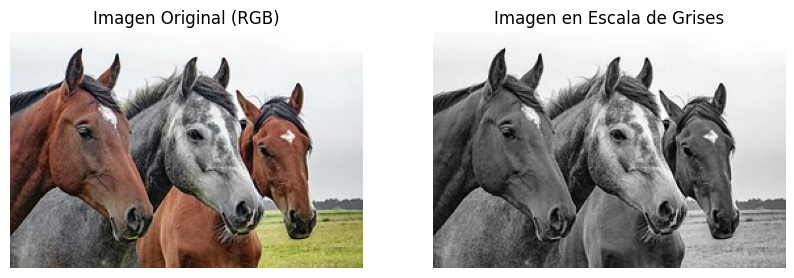

In [2]:
# Cargar la imagen de ejemplo y convertirla a escala de grises
# La convolución se aplica típicamente sobre imágenes de un solo canal.
image_rgb = imread('horses.jpg')
image_gray = rgb2gray(image_rgb)

# Visualizar la imagen original y en escala de grises
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen Original (RGB)')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen en Escala de Grises')
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.show()

##### **2.1. Filtros Convolucionales Fundamentales**

**Filtro de Suavizado (Blur)**

El filtro de suavizado o desenfoque reduce el ruido y el detalle de una imagen promediando los valores de los píxeles vecinos. El kernel más simple es el "Box Blur", que asigna el mismo peso a todos los vecinos.

**Propiedad clave:** Para que un filtro de suavizado conserve el brillo general de la imagen, la suma de los elementos de su kernel debe ser 1.


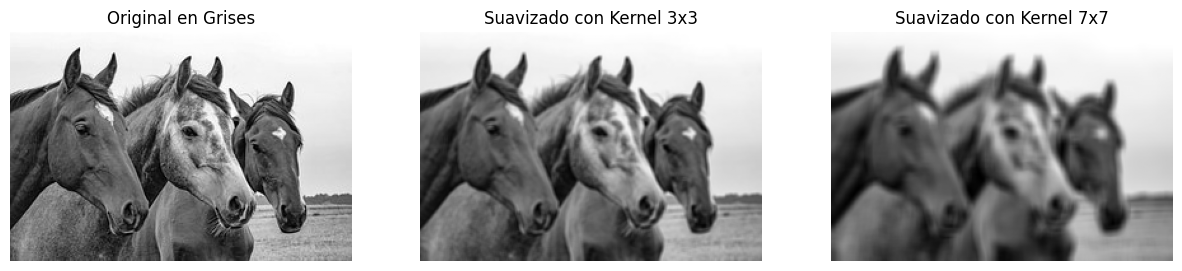

In [3]:
# --- Kernel de suavizado (Box Blur) ---
# El tamaño del kernel determina la intensidad del desenfoque.
# Normalizamos dividiendo por la suma total para que el kernel sume 1.

kernel_blur_3x3 = np.ones((3, 3)) / 9.0
kernel_blur_7x7 = np.ones((7, 7)) / 49.0

# Aplicar los filtros de convolución
blurred_3x3 = convolve2d(image_gray, kernel_blur_3x3, mode='same', boundary='symm')
blurred_7x7 = convolve2d(image_gray, kernel_blur_7x7, mode='same', boundary='symm')

# Visualizar los resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original en Grises')
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Suavizado con Kernel 3x3')
plt.imshow(blurred_3x3, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Suavizado con Kernel 7x7')
plt.imshow(blurred_7x7, cmap='gray')
plt.axis('off')

plt.show()

Como se puede observar, un kernel más grande produce un efecto de desenfoque más pronunciado.

#### **Filtros de Detección de Bordes**

Los bordes son regiones de una imagen con un cambio brusco de intensidad. Los filtros de detección de bordes están diseñados para resaltar estas áreas.

**Propiedad clave:** Los kernels para detectar bordes suelen tener valores positivos y negativos, y la suma de sus elementos es 0. Esto permite que el filtro actúe como un detector de diferencias, resultando en valores altos en los bordes y cero en regiones uniformes.



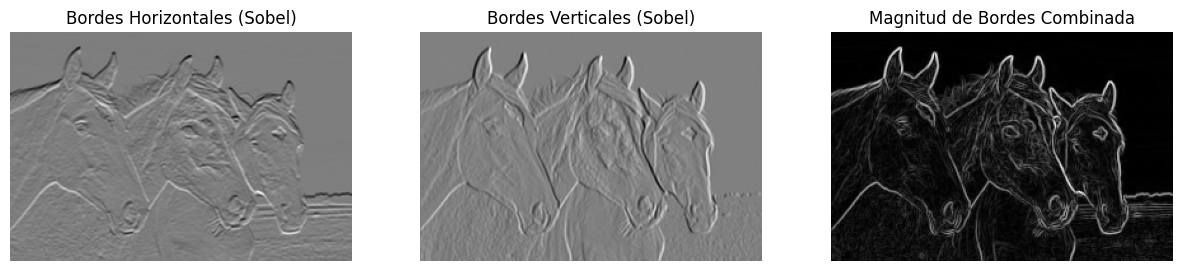

In [4]:
# --- Kernels de detección de bordes ---

# Filtro de Sobel para bordes horizontales
kernel_sobel_h = np.array([
    [ 1,  2,  1],
    [ 0,  0,  0],
    [-1, -2, -1]
])

# Filtro de Sobel para bordes verticales
kernel_sobel_v = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

# Aplicar los filtros
edges_h = convolve2d(image_gray, kernel_sobel_h, mode='same', boundary='symm')
edges_v = convolve2d(image_gray, kernel_sobel_v, mode='same', boundary='symm')

# Combinar ambos para detectar todos los bordes
# Usamos la magnitud: sqrt(h^2 + v^2)
edges_combined = np.sqrt(edges_h**2 + edges_v**2)

# --- Visualización ---
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Bordes Horizontales (Sobel)')
plt.imshow(edges_h, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Bordes Verticales (Sobel)')
plt.imshow(edges_v, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Magnitud de Bordes Combinada')
plt.imshow(edges_combined, cmap='gray')
plt.axis('off')

plt.show()

#### **Otros Filtros Comunes**

Existen muchos otros kernels para lograr efectos específicos:

*   **Sharpen (Enfoque):** Realza los bordes, haciendo la imagen más nítida. Funciona restando una versión suavizada de la imagen, lo que acentúa las diferencias de intensidad.
*   **Emboss (Repujado):** Crea un efecto de relieve o sombreado, como si la imagen estuviera grabada en una superficie.

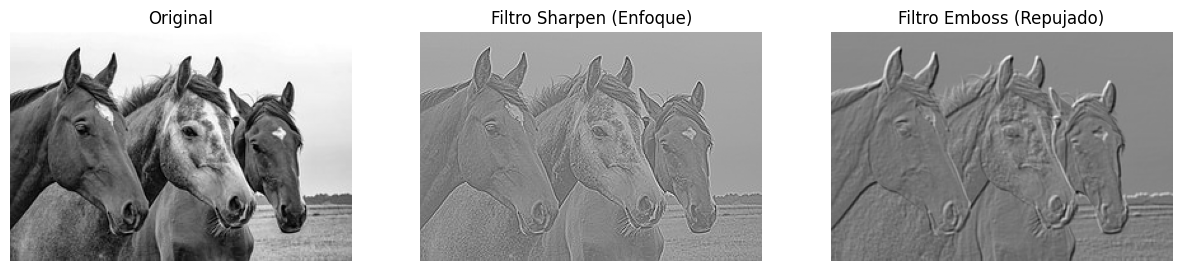

In [11]:
# --- Kernels para Sharpen y Emboss ---

kernel_sharpen = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
])

kernel_emboss = np.array([
    [-2, -1, 0],
    [-1,  1, 1],
    [ 0,  1, 2]
])

# Aplicar los filtros
sharpened_image = convolve2d(image_gray, kernel_sharpen, mode='same', boundary='symm')
embossed_image = convolve2d(image_gray, kernel_emboss, mode='same', boundary='symm')

# --- Visualización ---
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Filtro Sharpen (Enfoque)')
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Filtro Emboss (Repujado)')
plt.imshow(embossed_image, cmap='gray')
plt.axis('off')

plt.show()

#### **3. Visualización de Kernels**

Para entender mejor cómo funciona un filtro, es útil visualizar el kernel mismo. Podemos usar un mapa de calor, donde los colores representan los pesos del kernel.
    

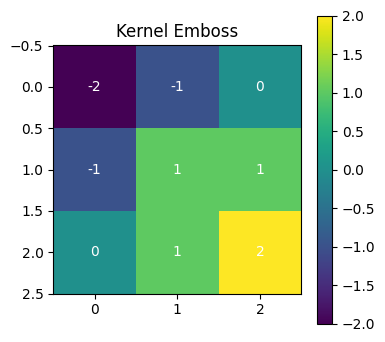

In [6]:
# Seleccionamos un kernel para visualizar
kernel_to_show = kernel_emboss
title = 'Kernel Emboss'

# Visualizar como mapa de calor
plt.figure(figsize=(4, 4))
plt.title(title)
plt.imshow(kernel_to_show, cmap='viridis')
plt.colorbar()
# Añadir los valores numéricos a cada celda para mayor claridad
for i in range(kernel_to_show.shape[0]):
    for j in range(kernel_to_show.shape[1]):
        plt.text(j, i, f"{kernel_to_show[i, j]}", ha='center', va='center', color='white')
plt.show()

### **4. Ejercicios Propuestos**

**Ejercicio A: Negativo de una Imagen**
Crea una función `invertir_imagen(imagen)` que calcule el negativo de la imagen. En una imagen de 8 bits, el negativo de un píxel con valor `p` es `255 - p`. Aplícala a `image_gray_uint8` y muestra el resultado.

**Ejercicio B: Transformación Gamma (Corrección Gamma)**
Investiga qué es la corrección gamma. La fórmula es `Salida = C * Entrada ^ γ`. Implementa una función `correccion_gamma(imagen, gamma)` donde `C` es una constante (generalmente 1).
1.  Normaliza la imagen de entrada al rango [0,1].
2.  Aplica la fórmula.
3.  Vuelve a escalar el resultado al rango .
4.  Prueba tu función con `gamma = 0.5` (que debería aclarar la imagen) y `gamma = 2.0` (que debería oscurecerla). Muestra los resultados.

**Ejercicio C: Diseña tu Propio Filtro**
1.  Diseña un kernel de 3x3 que detecte únicamente bordes diagonales (de esquina superior izquierda a inferior derecha).
2.  Justifica por qué elegiste esos valores para el kernel.
3.  Visualiza tu kernel como un mapa de calor.
4.  Aplica tu filtro a la imagen `image_gray` y muestra el resultado.

**Ejercicio D: Filtros sobre Imágenes a Color**
1.  Carga una imagen a color (`image_rgb`).
2.  Separa sus canales en R, G y B. Recuerda que es una matriz de 3D, por lo que `image_rgb[:, :, 0]` es el canal rojo.
3.  Aplica el filtro de `kernel_sharpen` a **cada uno de los tres canales** por separado.
4.  Vuelve a combinar los tres canales filtrados en una nueva imagen a color. Puedes usar `np.stack([canal_r, canal_g, canal_b], axis=-1)`.
5.  Muestra la imagen original y la imagen a color "enfocada".

**Ejercicio E: El Orden Importa**
1.  Toma la imagen en escala de grises (`image_gray`).
2.  Aplica primero un filtro de suavizado (`kernel_blur_3x3`) y, al resultado, aplícale un filtro de detección de bordes (`kernel_sobel_v`). Guarda esta imagen.
3.  Ahora, invierte el orden: aplica primero el filtro de detección de bordes a la imagen original y, al resultado, aplícale el filtro de suavizado. Guarda esta segunda imagen.
4.  Muestra ambas imágenes resultantes. ¿Son iguales? ¿Por qué crees que ocurre esta diferencia?

**Ejercicio F (Avanzado): Creando un Efecto de "Dibujo a Lápiz"**
1.  Convierte la imagen original a escala de grises.
2.  Invierte los colores de la imagen en grises. (Pista: si la imagen está en un rango, el inverso es `1 - imagen`).
3.  Aplica un filtro de suavizado Gaussiano (investiga `scipy.ndimage.gaussian_filter`) a la imagen invertida.
4.  "Mezcla" la imagen original en grises con la imagen suavizada e invertida para producir el efecto final. Una forma de hacerlo es con la operación "Color Dodge". Este paso es complejo y requiere investigación, pero es un excelente ejercicio de aplicación.
